<a href="https://colab.research.google.com/github/hellodoksa/machine-learning-Project/blob/master/1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%B2%88%EC%97%AD%EC%84%9C%EB%B9%84%EC%8A%A4%EC%9D%98_%EC%96%B8%EC%96%B4%EA%B0%90%EC%A7%80%EC%84%9C%EB%B9%84%EC%8A%A4_%EA%B5%AC%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연구목표 설정 
 - 유사서비스 : 카카오번역, 파파고, 구글 번역
 - 언어감지 하는 방법은 지도학습법을 사용하겠다. 
  - 알파벳 (26:피처)의 빈도 -> en fr id t ..
  - 독립변수의 빈도를 보고 레이블(정답, 종속변수)를 판단하게 되는 형태 -> 분류(지도학습)
  - 비영어권 제외, 알파벳 사용 국가 분류 총 데이터도 제공된 자료만 사용 (4개 국가)
  - 알고리즘의 업데이트 시점은 로그를 축적하여 1만건 누적되면 추가 학습 후 갱신하는 방법으로 진행

|step|단계명|수행내용|
| : --: |--:|:--|
|1|연구목표 설정 |- 언어를 감지하는 웹서비스어다. <br>- 머신러닝의 지도학습법의 분류 알고리즘을 이용하여 구현하겠다. <br>- 최적화 부분은 생략! <br>- 정확도에 대한 정략적인 목표는 생략|
|2|데이터 수집/확보|- 실전 : 위키피디아에서 텍스트를 웹스크래핑으로 수집하여 데이터를 확보<br>- 프로토 타입 구현 : 제공 데이터를 사용하겠다.|
|3|데이터 준비|- 전처리(데이터 원재료에서 알파벳을 빼고 모두 제거 -> 정규식<br>- 빈도 계산, 정규화<br>- 훈련용 데이터와 학습용 데이터를 75:25로 나눈다. |
|4|데이터 분석|- 영어권 언어별로 알파벳의 출현(사용) 빈도가 다르다는 명제(논문, 주장)을 근거로 증명<br>- 탐색적 분석, EDA를 이용하여 표현|
|5|데이터 모델링 구축|- 알고리즘 선택<br>- 학습<br>- 예측<br>- 성능평가<br>|
|6|시스템 통합|- 웹서비스 구축<br>- 모델덤프로드 모듈 구현<br>- 언어감지를 처리하는 모듈 구현<br>- 번역요청 로그 처리 |

# 데이터 수집/확보 

- 실전 : 위키피디아에서 텍스트를 웹스크래핑으로 수집하여 데이터를 확보
- 프로토 타입 구현 : 제공 데이터를 사용하겠다.
- 다수의 양질의 데이터를 제공하자! 

In [199]:

'''
# 위키피디아는 
https://ko.wikipedia.org/wiki/%EB%B0%A9%ED%83%84%EC%86%8C%EB%85%84%EB%8B%A8
https://en.wikipedia.org/wiki/BTS_(band)
https://fr.wikipedia.org/wiki/BTS_(groupe)

- 위키피디아에서 최초 Url의 국가코드를 조정하면 국가별로 진입 가능 
- 단, 검색어가 영어권에서 범용적인 부분을 사용하거나  혹은, 국가별로 리스트업이 필요하다. 
'''

'\n# 위키피디아는 \nhttps://ko.wikipedia.org/wiki/%EB%B0%A9%ED%83%84%EC%86%8C%EB%85%84%EB%8B%A8\nhttps://en.wikipedia.org/wiki/BTS_(band)\nhttps://fr.wikipedia.org/wiki/BTS_(groupe)\n\n- 위키피디아에서 최초 Url의 국가코드를 조정하면 국가별로 진입 가능 \n- 단, 검색어가 영어권에서 범용적인 부분을 사용하거나  혹은, 국가별로 리스트업이 필요하다. \n'

In [0]:
# URL에 대한 고민은 전제하고, 하나의 사이트에서 처리 루틴을 정리 
# 미국 위키피디아를 전제로 처리 
target_url = 'https://en.wikipedia.org/wiki/BTS_(band)'

In [0]:
# 웹 스트래핑 관련 모듈 가져오기 
# 통신 담당 : request 
# 파싱 담당 : BS4 (), 정밀 파싱을 위한 html5lib을 사용 (속도보다 정확한 처리가 중요)
import urllib.request as req
from bs4 import BeautifulSoup 

In [0]:
# 요청 
res = req.urlopen(target_url)

# 파싱
soup = BeautifulSoup( res,  'html5lib') ## 저 방식으로 파싱을 하겠다. 

In [203]:
# DOM tree
type(soup), soup


(bs4.BeautifulSoup, <!DOCTYPE html>
 <html class="client-nojs" dir="ltr" lang="en"><head>
 <meta charset="utf-8"/>
 <title>BTS (band) - Wikipedia</title>
 <script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XlLOCgpAMF0AAEybJzQAAABI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"BTS_(band)","wgTitle":"BTS (band)","wgCurRevisionId":942282448,"wgRevisionId":942282448,"wgArticleId":39862325,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Korean-language sources (ko)","CS1 Japanese-language sources (ja)

In [204]:
# 대상 태그를 모은다. 
ps = soup.select("#mw-content-text p") ## copy_select
len(ps)

79

In [205]:
## 텍스트를 모은다. 여러개의 리스트에 
for p in ps : 
  print('{%s}' % p.text)

{

}
{
}
{BTS (Korean: 방탄소년단; RR: Bangtan Sonyeondan), also known as the Bangtan Boys, is a seven-member South Korean boy band that began its formation in Seoul in 2010.[3] The septet co-writes and produces much of their output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth, loss, the journey towards loving oneself, and individualism. Their work features references to literature and psychological concepts and includes an alternative universe storyline. The group have staged several world tours.
}
{The group initially formed as teenagers under Big Hit Entertainment and released their debut single album, 2 Cool 4 Skool (2013). Subsequent work such as their first U.S. Billboard 200 entries The Most Beautiful Moment in Life, Part 2 (2015), The Most Beautiful Moment in Life: Young Forever (2016), and Wings (2016) h

In [206]:
# 텍스트를 모은다. 여러개의 리스트에 
# 리스트 내포를 이용하여 79개의 p 태그에서 텍스트를 추출하여 리스트에 구성원으로 추가
tmp = [p.text.strip()  for p in ps ]
tmp[:10]

['',
 '',
 'BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a seven-member South Korean boy band that began its formation in Seoul in 2010.[3] The septet co-writes and produces much of their output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth, loss, the journey towards loving oneself, and individualism. Their work features references to literature and psychological concepts and includes an alternative universe storyline. The group have staged several world tours.',
 'The group initially formed as teenagers under Big Hit Entertainment and released their debut single album, 2 Cool 4 Skool (2013). Subsequent work such as their first U.S. Billboard 200 entries The Most Beautiful Moment in Life, Part 2 (2015), The Most Beautiful Moment in Life: Young Forever (2016), and Wings

In [207]:
#리스트의 존재하는 문자열들을 한개의 문자열로 통합
src_txt = "".join(tmp)
print(type(src_txt))

<class 'str'>


- 영어는 소문자로 통일  (lower)
- 영어를 제외하고는 모두 제거 (정규식)
- 띄어쓰기 기준 정도는 남기고 싶다 (가독성을 높이기 위해) -> (정규식 중에 공백은 두자 !!)

In [0]:
##########################################################
# 정규식으로 들어가보자  ### 정규식 체크하자 ! 
import re 

In [209]:
#알파벳만 남기자  ## 정규식 sub는 매치 되는걸 날리는것이다. 
## 원하지 않는걸 매치 시켜야 그것들이 날아간다. 

p = re.compile('^{a-zA-Z }*') # {} : 글자하나 # * : 수십번 # ^ : 해당하는거 제외하고 
tmp = p.sub("", src_txt)
tmp.lower()[:100]

'bts (korean:\xa0방탄소년단; rr:\xa0bangtan sonyeondan), also known as the bangtan boys, is a seven-member south'

## 제공된 데이터 사용


In [0]:
# 파일을 한번에 다 읽으려면 => 특정 폴더 밑에서 특정 패턴을 가진 
#파일들을 지정해서 목록화 
# /content/train/en-1.txt

In [0]:
# 파일 리스트 획득 (특정 목록으로 가져와라 )
import glob

In [4]:
file_list = glob.glob('/content/train/*.txt')
type(file_list)


list

In [7]:
file_list.sort()
file_list

['/content/train/en-1.txt',
 '/content/train/en-2.txt',
 '/content/train/en-3.txt',
 '/content/train/en-4.txt',
 '/content/train/en-5.txt',
 '/content/train/fr-10.txt',
 '/content/train/fr-6.txt',
 '/content/train/fr-7.txt',
 '/content/train/fr-8.txt',
 '/content/train/fr-9.txt',
 '/content/train/id-11.txt',
 '/content/train/id-12.txt',
 '/content/train/id-13.txt',
 '/content/train/id-14.txt',
 '/content/train/id-15.txt',
 '/content/train/tl-16.txt',
 '/content/train/tl-17.txt',
 '/content/train/tl-18.txt',
 '/content/train/tl-19.txt',
 '/content/train/tl-20.txt']

# 데이터 준비 
- 데이터를 읽음ㄴ서 알파벳의 빈도를 계산
- 언어코드도 획득해서, 해당 언어에 알파벳의 빈도는 이런 식으로 표현 
- 알파벳별 빈도는(feature), 언어코드는(label)
- train 데이터는 row가 20개(국가별 5개), columnn(26 알파벳) + 1(답))
- shape =>(20,27)

In [0]:
# 파일에서 파일명 획득 => 언어코드가 존재하는지 
# 텍스트 파일이 하나 확인되면 
  # 언어코드 획득
    # 파일에서 파일명 획득 - > 언어코드가 존재한다. 
    # 언어코드를 추출
  #알파벳별 빈도수 획득
    # 전처리를 통해서 영어만 둔다
    # 알파벳별 빈도를 계산한다. 

### 언어코드 획득 

In [9]:
# 파일에서 파일명 획득 - > 언어코드가 존재한다. 
# 구조와 규칙이 변하지 않는다는 전제하에서 
file_list[0].split('/')[-1][:2]
# 언어코드를 추출

'en'

In [0]:
# 파일명 획득하는 방법 2
# 외장 함수를 활용하여 처리 
import os 
name = os.path.basename(file_list[0])

In [14]:
# 파일명 획득 방법 3
# 정규식으로 언어코드 획득 
import re
p = re.compile( '^[a-z]{2}')
lang_code = p.match(name).group() ## match는 시작 부터 
lang_code

'en'

### 알파벳 빈도 계산

In [38]:
# 텍스트 파일을 읽어서  알파벳만 남긴다. 
# 최종 변수명 text
with open(file_list[0], 'r') as f : 
  text = f. read().lower()

  #알파벳과 띄어쓰기만 남기기 
  p = re.compile('[^a-z]*') # {} : 글자하나 # * : 수십번 # ^ : 해당하는거 제외하고 
  text = p.sub("" , text)
  print(text[:100])

themainhenryfordmuseumbuildinghousessomeoftheclassroomsforthehenryfordacademyhenryfordacademyisthefi


In [40]:
# 알파벳 별로 카운트를 담을 그릇 (한개의 이름으로 26개의 정보를 담는 그릇)
# 파이썬 리스트를 사용한다. 수정 가능하고, 순서가 존재하므로 적합하다.
# a->z 까지는 순서가 존재함 
counts = [0 for n in range(26)]

# text에서 한글자씩 읽어서  - > a 이면 count[0] += 1
# 알파벳을 숫자로 바꿔야 한다.
# 알파벳은 아스키 코드로 순서가 존재한다.(순서대로)  => ord 함수 
# 따라서 특정 문자의 위치는 " ord('소문자') - ord('a') " "
for word in text : 
  counts[int(ord(word)- ord('a'))] += 1
  #counts[int(ord(word)- ord('a'))] =  counts[int(ord(word)- ord('a'))] + 1

print(counts) 
ord('a'),ord('z') , ord('z') - ord('a')

[349, 59, 210, 212, 484, 72, 88, 201, 340, 8, 25, 247, 121, 356, 412, 76, 0, 357, 282, 370, 119, 45, 65, 3, 92, 2]


(97, 122, 25)

- 데이터를 들여다 보니. 값의 편차가 크다. (최대, 최소 등으로 확인)
- 데이터는 빈도를 표현함으로, 최대 최소의 의미보다는, 총 빈도에서 특정 알파벳이 얼마나 등장했는지가 중요하다 -> 이것을 기주능로 정규화 처리 
- 데이터 준비 단계에서는 데이터의 품질을 향상을 목표로 하고, 주 수단으로 정한다.

In [41]:
sum(counts)

4595

In [62]:
# list(map(함수,데이터 덩어리 ))
def checkNum ( x ):
  return x/ sum(counts)

# freq = list(map(checkNum,counts))
freq = list(map(lambda x : x/sum(counts),counts))
print(freq)

[0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


In [63]:
## 텍스트 파일 1개에 대한 최종 결과물 
print(lang_code, freq)

en [0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


### 위의 구성 내용을 한칸에 넣어서 함수화 시킨다. 

In [71]:
def parsingData(file_path) : 
  name = os.path.basename(file_path)
  p = re.compile( '^[a-z]{2}')
  lang_code = p.match(name).group() ## match는 시작 부터 
  counts = [0 for n in range(26)]
  with open(file_path, 'r') as f : 
    text = f. read().lower()

    #알파벳과 띄어쓰기만 남기기 
    p = re.compile('[^a-z]*') # {} : 글자하나 # * : 수십번 # ^ : 해당하는거 제외하고 
    text = p.sub("" , text)
  
  for word in text : 
    counts[int(ord(word)- ord('a'))] += 1
    freq = list(map(lambda x : x/sum(counts),counts))
  return lang_code,freq

print(parsingData(file_list[0]))

('en', [0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296])


#데이터 준비 

In [0]:
def load_data( path='train' ):
  # 파일 경로 획득 
  file_lists = glob.glob( '/content/{}/*.txt'.format(path) )
  # 정답을 담을 리스트
  labels = list()
  freqs  = list()
  # 파일 경로를 한개씩 뽑아서  
  for f in file_lists:
    # 파일 1개당, 정답, 빈도수리스트 리턴
    lang, freq = parsingData( f )
    labels.append( lang )
    freqs.append( freq )
  return { 'labels':labels, 'freqs':freqs }

train_data = load_data()
test_data  = load_data('test')


In [0]:
# 덤프 (현 단계 결과물을 저장)
import json

with open('labels_freqs_data1.json', 'w') as f:
  # json 구조로 저장
  json.dump( [train_data, test_data], f )

# 데이터 분석 
- 알파벳의 빈도가 영어권 국가별로 다르다. 
- 시각적으로 표현



In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import json
%matplotlib inline 

#데이터 로드 
with open('labels_freqs_data1.json', 'r') as f:
  tmp = json.load(f)
# tmp[0] : train / tmp[1] : test
len(tmp)

2

In [79]:
# 데이터 크기 확인 
# 훈련 데이터 
len(tmp[0]['labels']),len(tmp[0]['freqs'])

(20, 20)

In [80]:
# 테스트 데이터 
len(tmp[1]['labels']),len(tmp[1]['freqs'])

(8, 8)

In [82]:
# 훈련 데이터를 DataFrame으로 로드 
df_freqs = pd.DataFrame(tmp[0]['freqs'])
df_freqs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.169205,0.025294,0.004562,0.032405,0.069708,0.007917,0.045086,0.015029,0.097350,0.006642,0.040993,0.048507,0.043408,0.088963,0.057900,0.029654,0.000000,0.050050,0.054411,0.049782,0.046629,0.002214,0.001811,0.000201,0.011741,0.000537
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596
2,0.072599,0.015761,0.039836,0.051129,0.157111,0.013031,0.013527,0.014396,0.085629,0.004344,0.001862,0.062050,0.029039,0.073964,0.056217,0.023455,0.005833,0.082030,0.066518,0.061057,0.042690,0.015140,0.000745,0.005088,0.004964,0.001986
3,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657


In [83]:
df_freqs.shape

(20, 26)

In [84]:
df_labels = pd.DataFrame(tmp[0]['labels'])
df_labels.head()

,0
0,id
1,en
2,fr
3,en
4,en


In [86]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null object
dtypes: object(1)
memory usage: 288.0+ bytes


In [99]:
#컬럼 명을 명확하게 조정 
# df_labels의 컬럼명을 label로 교체 
#df_labels.colmns = ['label']
df_labels.rename(columns = {0: 'label'},inplace=True)
df_labels

,label
0,id
1,en
2,fr
3,en
4,en
5,en
6,fr
7,id
8,tl
9,fr


In [103]:
from string import ascii_lowercase
list_dict = {}
for num in range(len(ascii_lowercase)) : 
  list_dict[num] = ascii_lowercase[num]
print(list_dict)
df_freqs.rename(columns= list_dict,inplace= True)
df_freqs

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0.169205,0.025294,0.004562,0.032405,0.069708,0.007917,0.045086,0.015029,0.097350,0.006642,0.040993,0.048507,0.043408,0.088963,0.057900,0.029654,0.000000,0.050050,0.054411,0.049782,0.046629,0.002214,0.001811,0.000201,0.011741,0.000537
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596
2,0.072599,0.015761,0.039836,0.051129,0.157111,0.013031,0.013527,0.014396,0.085629,0.004344,0.001862,0.062050,0.029039,0.073964,0.056217,0.023455,0.005833,0.082030,0.066518,0.061057,0.042690,0.015140,0.000745,0.005088,0.004964,0.001986
3,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657
5,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553
6,0.078738,0.010451,0.037253,0.053283,0.150487,0.016222,0.010708,0.015517,0.069377,0.002308,0.004104,0.070274,0.026802,0.072198,0.049179,0.026032,0.005899,0.075083,0.071621,0.077584,0.053475,0.014299,0.000705,0.003911,0.003655,0.000834
7,0.126059,0.032387,0.014449,0.034380,0.096662,0.004484,0.059791,0.013951,0.104634,0.003986,0.024913,0.048331,0.029397,0.086198,0.037369,0.024913,0.000000,0.076731,0.069258,0.046836,0.042352,0.003986,0.006477,0.001495,0.009467,0.001495
8,0.177559,0.022822,0.019018,0.021784,0.064920,0.004927,0.066909,0.019018,0.074516,0.001902,0.020574,0.042445,0.037344,0.112984,0.056017,0.029132,0.000432,0.045902,0.058956,0.054806,0.027835,0.005100,0.008212,0.000864,0.023340,0.002680
9,0.077913,0.014919,0.035749,0.044830,0.149735,0.011784,0.011496,0.012613,0.072003,0.002126,0.001946,0.065011,0.031461,0.068759,0.056939,0.029154,0.006847,0.074741,0.082093,0.070561,0.054452,0.010631,0.004541,0.003892,0.005334,0.000468


In [0]:
colum = list(ascii_lowercase)

In [119]:
#df_freqs, df_labels 결합하여 => 20,27으로 나오게 
# df_merge_data = pd.concat([df_labels,df_freqs], axis=1)
df_tmp = pd.merge(df_labels,df_freqs,left_index=True, right_index=True)
#df1.merge(df2, left_on='lkey', right_on='rkey')
df_tmp

,label,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,id,0.169205,0.025294,0.004562,0.032405,0.069708,0.007917,0.045086,0.015029,0.097350,0.006642,0.040993,0.048507,0.043408,0.088963,0.057900,0.029654,0.000000,0.050050,0.054411,0.049782,0.046629,0.002214,0.001811,0.000201,0.011741,0.000537
1,en,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596
2,fr,0.072599,0.015761,0.039836,0.051129,0.157111,0.013031,0.013527,0.014396,0.085629,0.004344,0.001862,0.062050,0.029039,0.073964,0.056217,0.023455,0.005833,0.082030,0.066518,0.061057,0.042690,0.015140,0.000745,0.005088,0.004964,0.001986
3,en,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
4,en,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657
5,en,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553
6,fr,0.078738,0.010451,0.037253,0.053283,0.150487,0.016222,0.010708,0.015517,0.069377,0.002308,0.004104,0.070274,0.026802,0.072198,0.049179,0.026032,0.005899,0.075083,0.071621,0.077584,0.053475,0.014299,0.000705,0.003911,0.003655,0.000834
7,id,0.126059,0.032387,0.014449,0.034380,0.096662,0.004484,0.059791,0.013951,0.104634,0.003986,0.024913,0.048331,0.029397,0.086198,0.037369,0.024913,0.000000,0.076731,0.069258,0.046836,0.042352,0.003986,0.006477,0.001495,0.009467,0.001495
8,tl,0.177559,0.022822,0.019018,0.021784,0.064920,0.004927,0.066909,0.019018,0.074516,0.001902,0.020574,0.042445,0.037344,0.112984,0.056017,0.029132,0.000432,0.045902,0.058956,0.054806,0.027835,0.005100,0.008212,0.000864,0.023340,0.002680
9,fr,0.077913,0.014919,0.035749,0.044830,0.149735,0.011784,0.011496,0.012613,0.072003,0.002126,0.001946,0.065011,0.031461,0.068759,0.056939,0.029154,0.006847,0.074741,0.082093,0.070561,0.054452,0.010631,0.004541,0.003892,0.005334,0.000468


### Pivot 
(특정 컬럼에 반복적을 데이터가 보이면, 그 종류가 한정적)
- 현재 데이터는 일종의 로그가 누적된 데이터이다. 
- 이 데이터에서 숨겨진 정보를 추출하기 위해서 , 관점을 달리하여 데이터를 재구성 
- 국가별 알파벳의 빈도 
- row : 국가별 정렬
- column :  알파벳으로 정렬 
- index : en , fr .. etc  / column : a ~ z로 재구성 하라 -> pivot table 사용 

In [0]:
# label 값 추출 
# 중복 제거 
all_index  = df_tmp['label'].unique( )

In [193]:
# 결과물 (4, 26)
# "" df_tmp.label"" 이게 중요함 
df_tmp_pv = df_tmp.pivot_table(columns=df_tmp.label)
df_tmp_pv

label,en,fr,id,tl
a,0.075558,0.076183,0.160047,0.210537
b,0.018601,0.013140,0.026276,0.021824
c,0.036565,0.036707,0.008391,0.010842
d,0.039376,0.049217,0.038213,0.019756
e,0.124937,0.150272,0.085395,0.041240
f,0.016977,0.012729,0.008259,0.003260
g,0.023900,0.013278,0.044496,0.075524
h,0.042127,0.014709,0.017399,0.014543
i,0.074847,0.077658,0.095626,0.078540
j,0.002329,0.003138,0.006473,0.001603


In [146]:
# a - z 가 index, 국가가 컬럼
df_tmp_pv.shape

(26, 4)

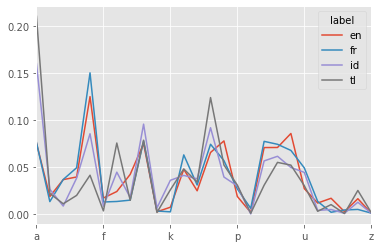

In [147]:
# Bar chart 
plt.style.use('ggplot')
df_tmp_pv.plot()
plt.show()

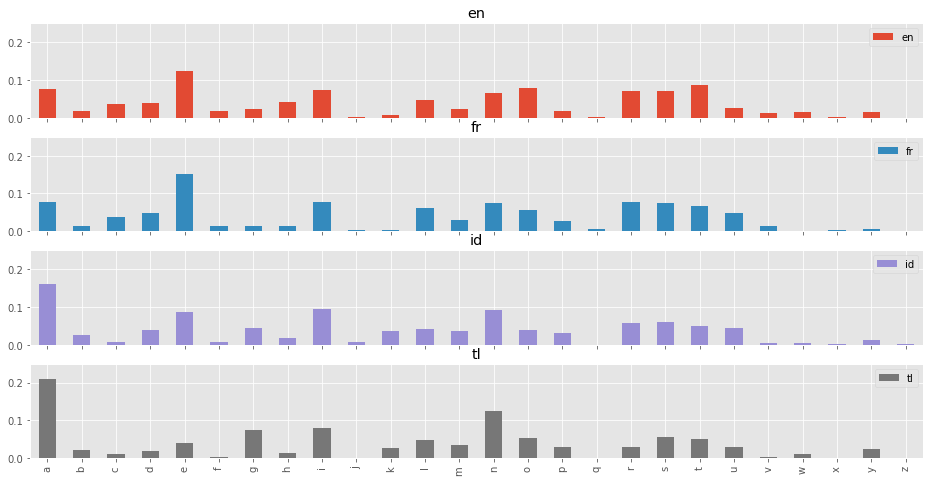

In [156]:
# Bar chart 
plt.style.use('ggplot')

# y축의 값을 특정 구간으로 제한하겠다. 
df_tmp_pv.plot(kind ='bar', subplots= True, #subplots : 한줄에 하나씩 
               figsize = (16,8) , 
               ylim=(0,0.25))  # 사이즈 늘리기 
plt.savefig('na_per_freqs.png')
plt.show()

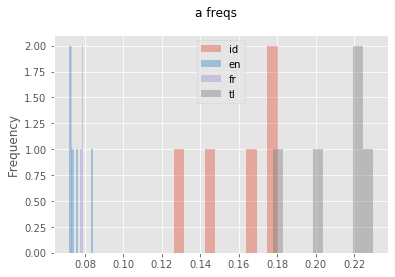

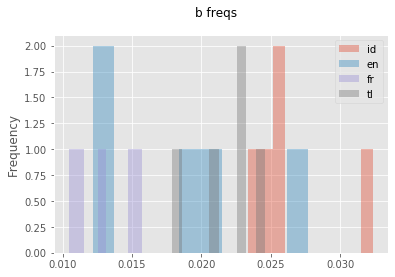

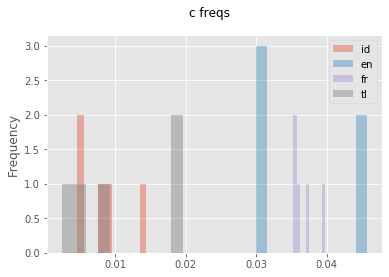

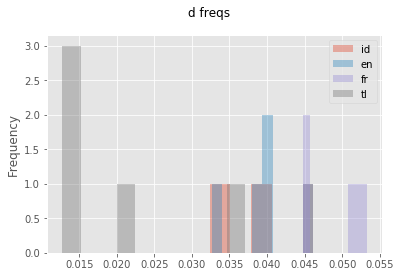

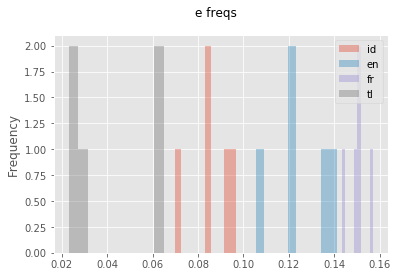

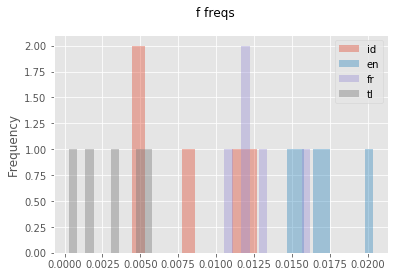

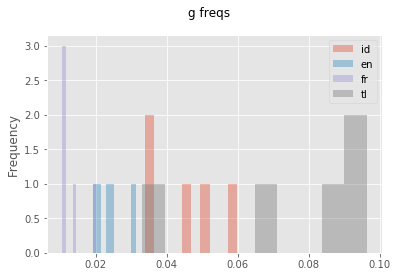

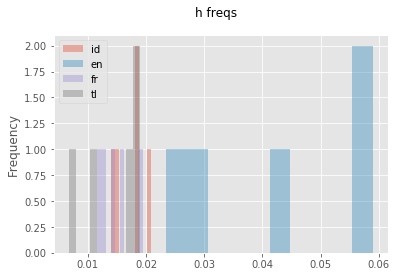

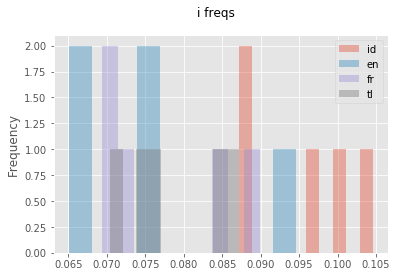

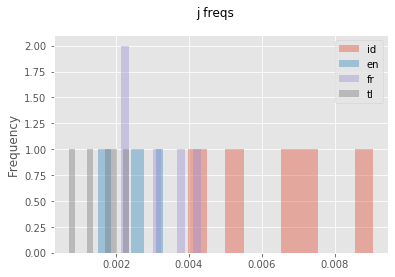

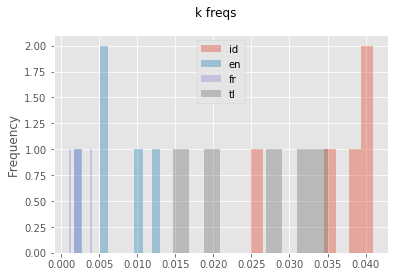

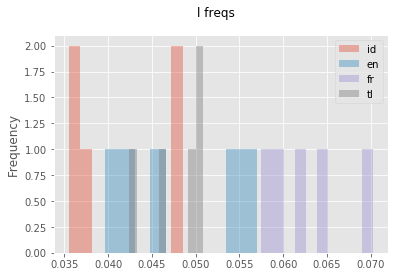

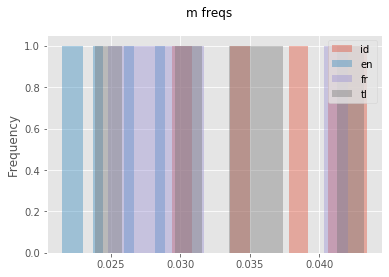

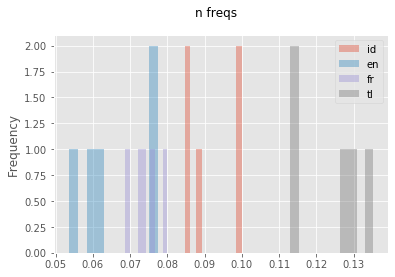

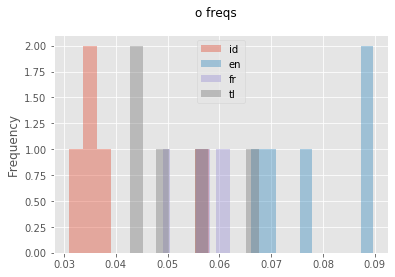

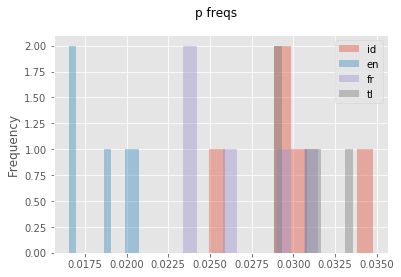

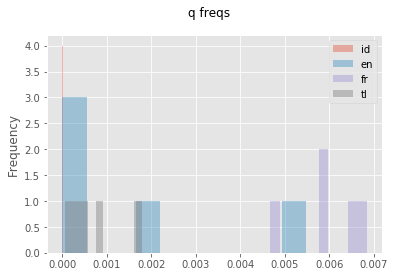

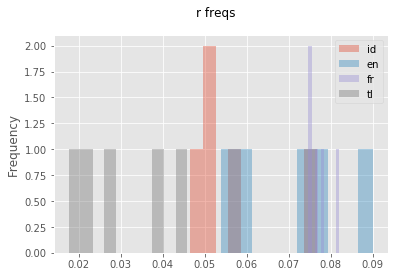

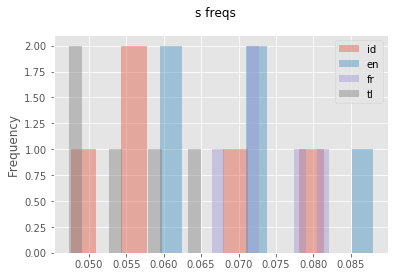

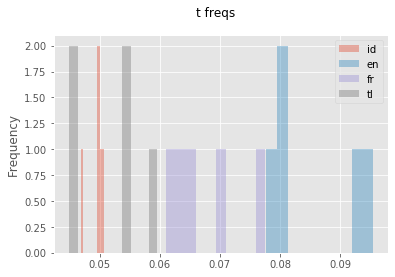

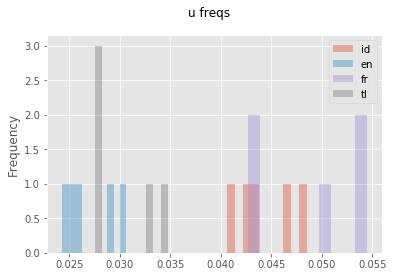

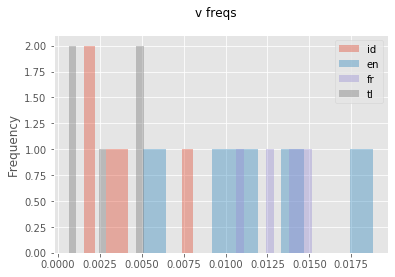

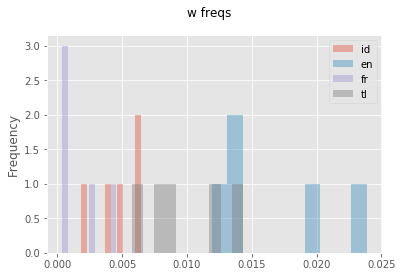

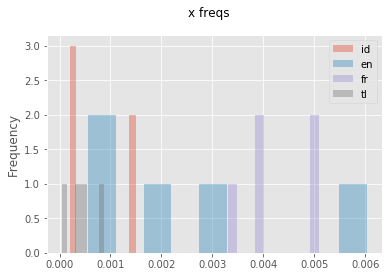

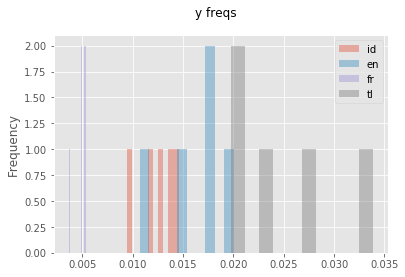

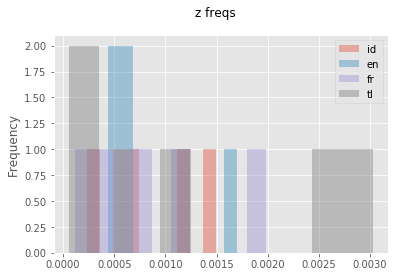

In [195]:
# 단어별로 (a~ z)로 한개의 차트에 국가별로 빈도를 그린다
# 이 차트는 저장한다 => a_freqs.png, b_freqs.png, .. z_freqs.png
# 한개의 차트에 여러값을 표현하여 비중의 차이점을 그린다 
# 데이터는 df_tmp를 이용하여, a만 모아서 국가별로 그리고, b만모아서그리고,..
# 한차트에 겹쳐그려서 데이터의 위치(분포)가 구분되는지, 겹치는지 확인=>히스토그램
# 추가설명
# 차트는 총 26개
# ex) a빈도를 그린다면, 한 차트에 특정국가별로 a만 그린다(국가별로색구분됨)
#     색의 겹침을 보기 위해서 투명값을 부여 alpha=0.4

# a-z : 26 / 국가코드 : 4
for word in ascii_lowercase : 
  for na in df_tmp['label'].unique(): 
    tmp = df_tmp[df_tmp['label'] == na][word]
    tmp.plot(kind= 'hist' , alpha = 0.4  #투명값 
             ,label = na 
             )
  plt.legend()
  plt.suptitle('%s freqs' % word)
  plt.savefig('%s_freqs.png' %word)
  plt.show()


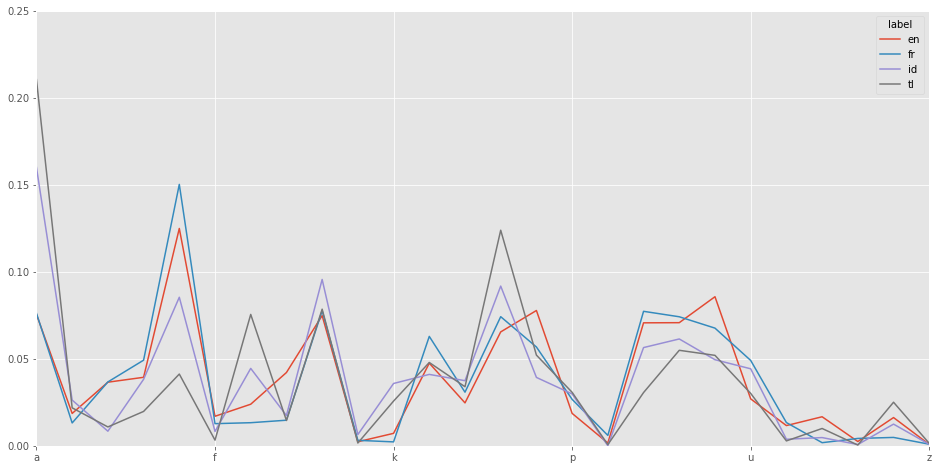

In [194]:
# 선형 차트로 최종 다시 확인 
df_tmp_pv.plot(kind ='line' , figsize=(16,8) , ylim =(0,0.25) )

# 데이터 모델링 구축

# 시스템 통합
